# Marketing Campaign



## Context
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### Content
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
<br>AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
<br>AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
<br>AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
<br>AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
<br>Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
<br>Complain - 1 if customer complained in the last 2 years
<br>DtCustomer - date of customer’s enrolment with the company
<br>Education - customer’s level of education
<br>Marital - customer’s marital status
<br>Kidhome - number of small children in customer’s household
<br>Teenhome - number of teenagers in customer’s household
<br>Income - customer’s yearly household income
<br>MntFishProducts - amount spent on fish products in the last 2 years
<br>MntMeatProducts - amount spent on meat products in the last 2 years
<br>MntFruits - amount spent on fruits products in the last 2 years
<br>MntSweetProducts - amount spent on sweet products in the last 2 years
<br>MntWines - amount spent on wine products in the last 2 years
<br>MntGoldProds - amount spent on gold products in the last 2 years
<br>NumDealsPurchases - number of purchases made with discount
<br>NumCatalogPurchases - number of purchases made using catalogue
<br>NumStorePurchases - number of purchases made directly in stores
<br>NumWebPurchases - number of purchases made through company’s web site
<br>NumWebVisitsMonth - number of visits to company’s web site in the last month
<br>Recency - number of days since the last purchase
<br>Z_CostContact - Cost Campaign per Customer
<br>Z_Revenue - Revenue Campaign per Customer

Acknowledgements
<br>O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

Inspiration
<br>The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
# Load Dataset
df = pd.read_csv('marketing_campaign.csv', sep = ';')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


- `Year_Birth` diubah menjadi `age`
- `Marital_Status` di regroup menjadi 2 value saja
- `Kidhome` & `Teenhome` digabung menjadi jumlah anak
- `Dt_Customer` diubah jadi udah berapa tahun enroll
- `AcceptedCmp1-5` digabungkan menjadi total accepted campaign
- `Z_CostContact` & `Z_Revenue` value sama tiap baris sebaiknya didrop
- Kolom `Response` merupakan kolom target

## Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Terdapat nilai `Null` pada kolom `Income`
- Kolom `Dt_Customer` memiliki tipe data object, diubah menjadi datetime


In [ ]:
# Pemisahan kolom berdasarkan data numeric dan category
cats = ['Education', 'Marital_Status']

cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
           'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Complain']

nums = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth']

In [ ]:
# Statistika deskriptif kolom numerik
df[nums].describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Year_Birth
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,1968.805804
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1893.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1959.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,1970.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1977.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1996.000000


- Kolom `Income`, `Recency`, dan `Year_Birth` relatif normal karena mean hampir sama dengan median
- `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` memiliki nilai mean yang cukup berbeda dari nilai median yang mengindikasikan adanya skewness

In [ ]:
# Statistika deskriptif kolom category
df[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


- `Education` yang paling banyak adalah Graduation dengan frekuensi 1127
- `Marital_Status` yang paling banyak adalah Married dengan frekuensi 864
- Kolom `Marital_Status` memiliki value yang berarti sama, dapat digabung menjadi satu value baru

In [ ]:
# Ekstrak variable cost dan revenue dari DataFrame
cost = df['Z_CostContact'].unique()[0]
revenue = df['Z_Revenue'].unique()[0]

### Campaign 1

In [ ]:
# Melihat hasil Campaign pertama
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [ ]:
# Menghitung Conversion Rate dan ROI dari Campaign pertama
convert_cmp_1 = df['AcceptedCmp1'].value_counts()[1]
not_convert_cmp_1 = df['AcceptedCmp1'].value_counts()[0]
total_cmp_1 = convert_cmp_1 + not_convert_cmp_1

conv_rate_cmp_1 = (convert_cmp_1/total_cmp_1)*100
ROI_cmp_1 = ((convert_cmp_1*revenue)/(total_cmp_1*cost))*100

print(('Conversion Rate Campaign 1: %.2f' % conv_rate_cmp_1)+'%')
print(('Return Of Investment Campaign 1: %.2f' % ROI_cmp_1)+'%')

Conversion Rate Campaign 1: 6.43%
Return Of Investment Campaign 1: 23.57%


### Campaign 2

In [ ]:
# Melihat hasil Campaign kedua
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [ ]:
# Menghitung Conversion Rate dan ROI dari Campaign kedua
convert_cmp_2 = df['AcceptedCmp2'].value_counts()[1]
not_convert_cmp_2 = df['AcceptedCmp2'].value_counts()[0]
total_cmp_2 = convert_cmp_2 + not_convert_cmp_2

conv_rate_cmp_2 = (convert_cmp_2/total_cmp_2)*100
ROI_cmp_2 = ((convert_cmp_2*revenue)/(total_cmp_2*cost))*100

print(('Conversion Rate Campaign 2: %.2f' % conv_rate_cmp_2)+'%')
print(('Return Of Investment Campaign 2: %.2f' % ROI_cmp_2)+'%')

Conversion Rate Campaign 2: 1.34%
Return Of Investment Campaign 2: 4.91%


### Campaign 3

In [ ]:
# Melihat hasil Campaign ketiga
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [ ]:
# Menghitung Conversion Rate dan ROI dari Campaign ketiga
convert_cmp_3 = df['AcceptedCmp3'].value_counts()[1]
not_convert_cmp_3 = df['AcceptedCmp3'].value_counts()[0]
total_cmp_3 = convert_cmp_3 + not_convert_cmp_3

conv_rate_cmp_3 = (convert_cmp_3/total_cmp_3)*100
ROI_cmp_3 = ((convert_cmp_3*revenue)/(total_cmp_3*cost))*100

print(('Conversion Rate Campaign 3: %.2f' % conv_rate_cmp_3)+'%')
print(('Return Of Investment Campaign 3: %.2f' % ROI_cmp_3)+'%')

Conversion Rate Campaign 3: 7.28%
Return Of Investment Campaign 3: 26.68%


### Campaign 4

In [ ]:
# Melihat hasil Campaign keempat
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [ ]:
# Menghitung Conversion Rate dan ROI dari Campaign keempat
convert_cmp_4 = df['AcceptedCmp4'].value_counts()[1]
not_convert_cmp_4 = df['AcceptedCmp4'].value_counts()[0]
total_cmp_4 = convert_cmp_4 + not_convert_cmp_4

conv_rate_cmp_4 = (convert_cmp_4/total_cmp_4)*100
ROI_cmp_4 = ((convert_cmp_4*revenue)/(total_cmp_4*cost))*100

print(('Conversion Rate Campaign 4: %.2f' % conv_rate_cmp_4)+'%')
print(('Return Of Investment Campaign 4: %.2f' % ROI_cmp_4)+'%')

Conversion Rate Campaign 4: 7.46%
Return Of Investment Campaign 4: 27.34%


### Campaign 5

In [ ]:
# Melihat hasil Campaign kelima
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

In [ ]:
convert_cmp_5 = df['AcceptedCmp5'].value_counts()[1]
not_convert_cmp_5 = df['AcceptedCmp5'].value_counts()[0]
total_cmp_5 = convert_cmp_5 + not_convert_cmp_5

conv_rate_cmp_5 = (convert_cmp_5/total_cmp_5)*100
ROI_cmp_5 = ((convert_cmp_5*revenue)/(total_cmp_5*cost))*100

print(('Conversion Rate Campaign 5: %.2f' % conv_rate_cmp_5)+'%')
print(('Return Of Investment Campaign 5: %.2f' % ROI_cmp_5)+'%')

Conversion Rate Campaign 5: 7.28%
Return Of Investment Campaign 5: 26.68%


### Last Campaign

In [ ]:
# Melihat hasil Campaign terakhir
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [ ]:
# Menghitung Conversion Rate dan ROI dari Campaign terakhir
convert_last_cmp = df['Response'].value_counts()[1]
not_convert_last_cmp = df['Response'].value_counts()[0]
total_last_cmp = convert_last_cmp + not_convert_last_cmp

conv_rate_last_cmp = (convert_last_cmp/total_last_cmp)*100
ROI_last_cmp = ((convert_last_cmp*revenue)/(total_last_cmp*cost))*100

print(('Conversion Rate Last Campaign: %.2f' % conv_rate_last_cmp)+'%')
print(('Return Of Investment Last Campaign: %.2f' % ROI_last_cmp)+'%')

Conversion Rate Last Campaign: 14.91%
Return Of Investment Last Campaign: 54.67%


In [ ]:
# Menyatukan hasil seluruh Campaign ke dalam DataFrame
dict_cmp = {'Campaign': ['Campaign 1', 'Campaign 2', 
                         'Campaign 3', 'Campaign 4',
                         'Campaign 5', 'Last Campaign',],
            'Conversion Rate (%)': [conv_rate_cmp_1, conv_rate_cmp_2,
                                    conv_rate_cmp_3, conv_rate_cmp_4,
                                    conv_rate_cmp_5, conv_rate_last_cmp],
            'Return Of Investment (%)': [ROI_cmp_1, ROI_cmp_2,
                                         ROI_cmp_3, ROI_cmp_4,
                                         ROI_cmp_5, ROI_last_cmp]
            } 

df_cmp = pd.DataFrame.from_dict(dict_cmp)
df_cmp

,Campaign,Conversion Rate (%),Return Of Investment (%)
0,Campaign 1,6.428571,23.571429
1,Campaign 2,1.339286,4.910714
2,Campaign 3,7.276786,26.681548
3,Campaign 4,7.455357,27.336310
4,Campaign 5,7.276786,26.681548
5,Last Campaign,14.910714,54.672619


## Data Visualization

### ROI 6 Campaign Sebelumnya

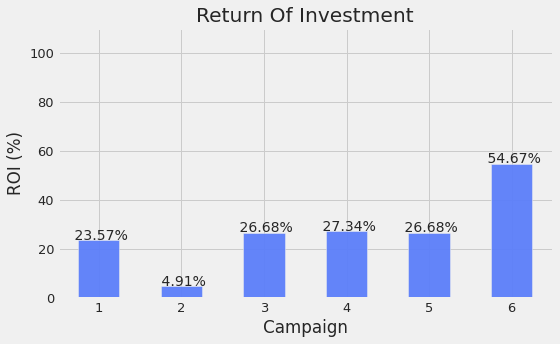

In [ ]:
# Visualisasi ROI dari 6 Campaign sebelumnya
df_cmp = df_cmp['Return Of Investment (%)']
df_cmp.index = [f'{i}' for i in range(1, 7)]
df_cmp.sort_values('index')

ax = df_cmp.plot(kind = 'bar', color = '#5b7efa', 
                 alpha = .95, fontsize = 13, 
                 figsize = (8, 5))

plt.title('Return Of Investment')
plt.ylabel('ROI (%)')

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    perc = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{perc: .2f}%', (x + width/2, y + height*1.01), ha = 'center')

plt.xlabel('Campaign')
plt.legend
plt.xticks(rotation = 0)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

- Selama 6 Campaign terakhir, ROI tidak pernah mencapai 100% yang berarti Campaign selalu Loss

### Hasil Last Campaign

Text(0.5, 1.0, 'Response')

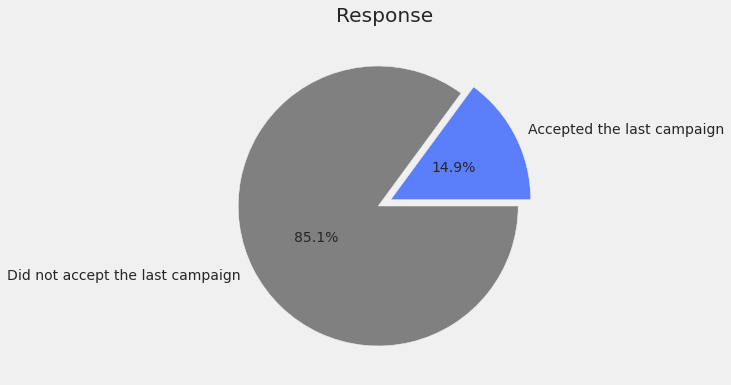

In [ ]:
# Visualisasi hasil dari Last Campaign
df_vis = df.copy()
df_vis['Response'] = df_vis['Response'].replace([0, 1], ['Did not accept the last campaign', 'Accepted the last campaign'])
dfresponse = df_vis.groupby(['Response'])['ID'].nunique()

pie, ax = plt.subplots(figsize = [10,6])
labels = dfresponse.keys()
plt.pie(x = dfresponse, autopct = "%.1f%%", explode = [0.05]*2, colors = (['#5b7efa', 'gray']), labels = labels, pctdistance = 0.5, textprops = {'fontsize': 14})
plt.title('Response')

- Dari 2240, hanya 334 Customer yang menerima Campaign terakhir.

### Customer's Recency

In [ ]:
# Visualisasi Recency Customer dan hubungannya dengan Response
df_vis['Recency_Group'] = np.where(df_vis['Recency'] > 75, '> 75 Days',
                               np.where(df_vis['Recency'] < 25, '< 25 Days', '25-75 Days'))

def response_bar_plot(df, column, title = '', xlabel = '', figsize = (10, 5), ylim_offset = 5, ax = None):
    df_bar = (df.groupby(['Response', column])[
              'ID'].nunique().to_frame('customer_percentage')/df.shape[0])*100
    df_bar = df_bar.reset_index().sort_values(by = column, ascending = True)
    
    
    plt.figure(figsize = figsize)
    
    ax = sns.barplot(x = column, y = 'customer_percentage', hue = 'Response',
                     hue_order = ['Did not accept the last campaign',
                                  'Accepted the last campaign'],
                     data = df_bar, palette = (['gray', '#5b7efa']), alpha = 1, saturation = 1, edgecolor = 'k', linewidth = .7,
                     order=['< 25 Days', '25-75 Days', '> 75 Days'])
    
    
    # Add this loop to add the annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate('%.1f' % height + '%', (x + width /
                                            1.8, y + height*1.01), ha = 'center')

    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    plt.legend(fontsize = 'medium', loc = 'best', title = '')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('% customers')
    plt.ylim(0, df_bar.customer_percentage.max() + ylim_offset)
    plt.tight_layout()

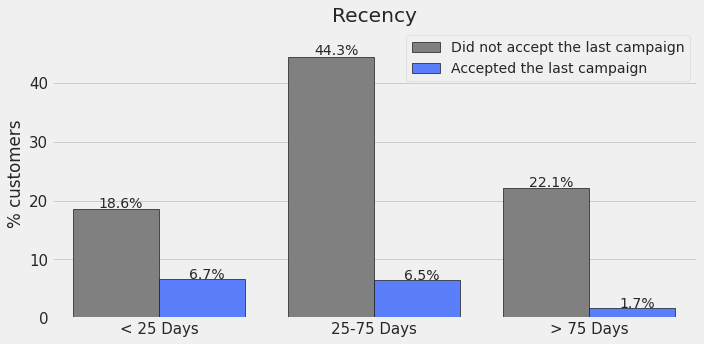

In [ ]:
response_bar_plot(df_vis, 'Recency_Group', title = 'Recency')

- Persentase tertinggi customer yang menerima Campaign terakhir berasal dari pelanggan yang melakukan pembelian terakhir mereka tidak lebih dari 75 hari yang lalu.

### Products and Channels

In [ ]:
# Inisiasi fungsi Visualisasi
def response_bar_plot2(df, column, title = '', xlabel = '', figsize = (10, 5), ylim_offset = 5, ax = None):
    df_bar = (df.groupby(['Response', column])['Transactions'].sum().to_frame('customer_percentage')/(df['Transactions'].sum()))*100
    df_bar = df_bar.reset_index().sort_values(by = column, ascending = True)
    
    
    plt.figure(figsize = figsize)
    
    ax = sns.barplot(x = column, y = 'customer_percentage', hue = 'Response',
                     hue_order = ['Did not accept the last campaign',
                                  'Accepted the last campaign'],
                     data = df_bar, palette = (['gray', '#5b7efa']), alpha = 1, saturation = 1, edgecolor = 'k', linewidth = .7)
    
    
    # Add this loop to add the annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate('%.1f' % height + '%', (x + width /
                                            1.8, y + height*1.01), ha = 'center')

    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    plt.legend(fontsize = 'medium', loc = 'best', title = '')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('% customers')
    plt.ylim(0, df_bar.customer_percentage.max() + ylim_offset)
    plt.tight_layout()

In [ ]:
# Visualisasi Products dan hubungannya dengan Response
dfprods = df_vis[['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
dfprods = dfprods.rename(columns = {'MntWines': 'Wine', 'MntFruits': 'Fruit',
                                   'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish',
                                   'MntSweetProducts': 'Sweet', 'MntGoldProds': 'Gold'})
dfprods = dfprods.melt('ID', var_name = 'Products', value_name = 'Transactions')

df2 = df_vis.merge(dfprods, on = 'ID')
df2 = df2[['ID', 'Products', 'Transactions', 'Response']]

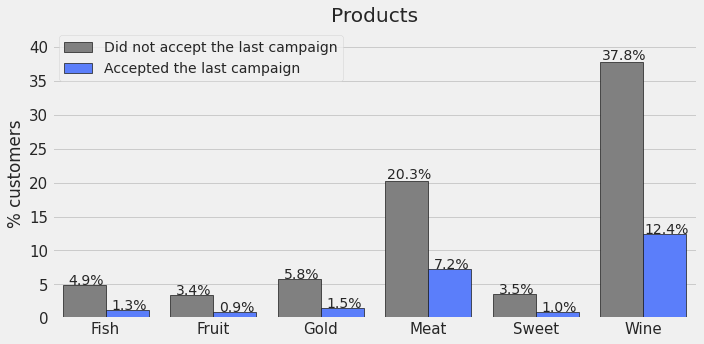

In [ ]:
# Memanggil fungsi visualisasi untuk visualisasi products
response_bar_plot2(df2, 'Products', title = 'Products')

- Customer yang membeli produk Meat dan Wine cenderung menerima Campaign terakhir daripada customer yang membeli kategori produk lain.

In [ ]:
# Visualisasi Channels dan hubungannya dengan Response
dfchannels = df_vis[['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
dfchannels = dfchannels.rename(columns = {'NumWebPurchases': 'Website', 'NumCatalogPurchases': 'Catalog', 'NumStorePurchases': 'Store'})
dfchannels = dfchannels.melt('ID', var_name = 'Channels', value_name = 'Transactions')

df3 = df_vis.merge(dfchannels, on = 'ID')
df3 = df3[['ID', 'Channels', 'Transactions', 'Response']]

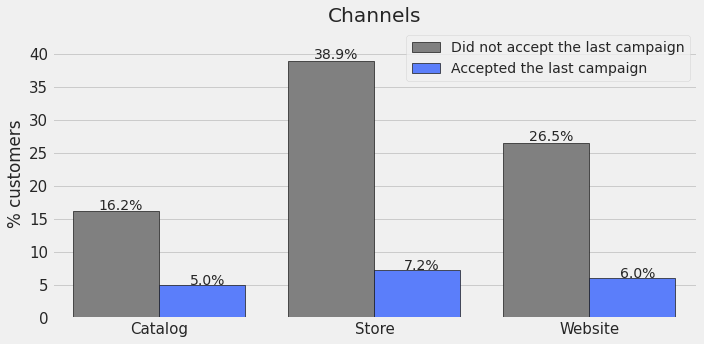

In [ ]:
# Memanggil fungsi Visualisasi untuk visualisasi Channels
response_bar_plot2(df3, 'Channels', title = 'Channels')

- Persentase pembelian customer yang menerima Campaign terakhir tidak terlalu berbeda di ketiga channel penjualan.

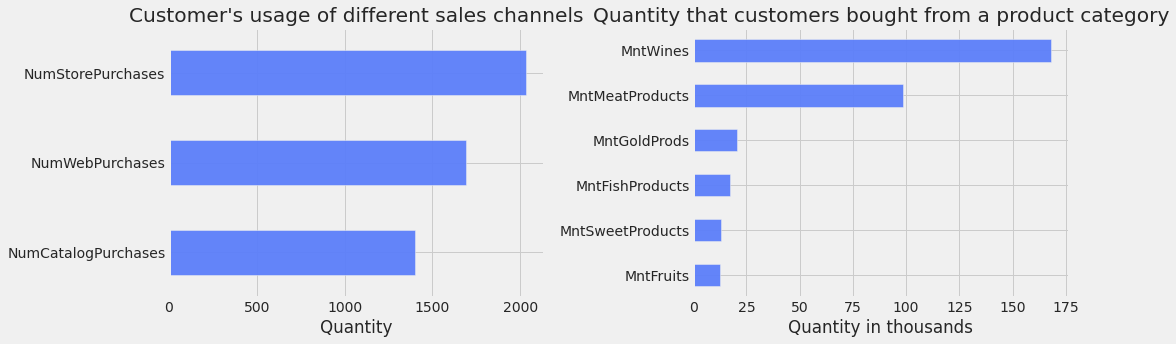

In [ ]:
# Visualisasi Total Penjualan Products dan Channels
f, ax = plt.subplots(1, 2, figsize = (16, 5))

(df_vis[df_vis['Response'] == 'Accepted the last campaign'][['MntWines', 'MntFruits', 
                       'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds']]\
 .sum()/1000).sort_values().plot(kind = 'barh', 
                                 color = '#5b7efa', 
                                 alpha = .95, 
                                 ax = ax[1])
ax[1].xaxis.set_tick_params(labelsize = 14)
ax[1].yaxis.set_tick_params(labelsize = 14)
ax[1].set_xlabel('Quantity in thousands')
ax[1].set_title('Quantity that customers bought from a product category')

df_vis[df_vis.Response == 'Accepted the last campaign'][['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]\
                .sum().sort_values().plot(kind = 'barh', 
                                          color = '#5b7efa', 
                                          alpha = .95, 
                                          ax = ax[0])
ax[0].xaxis.set_tick_params(labelsize = 14)
ax[0].yaxis.set_tick_params(labelsize = 14)
ax[0].set_xlabel('Quantity')
ax[0].set_title("Customer's usage of different sales channels")
plt.tight_layout()
plt.show()

-  Sebagian besar pembelian dilakukan melalui store (> 2000 pembelian), diikuti oleh website dan katalog.
- Produk yang paling banyak dibeli oleh customer adalah wine dan meat.

### Campaign Success Rate

In [ ]:
# Visualisasi Success Rate dari 6 Campaign sebelumnya
df_vis['Accepted_Campaign'] = df_vis['AcceptedCmp1'] + df_vis['AcceptedCmp2'] + df_vis['AcceptedCmp3'] + df_vis['AcceptedCmp4'] + df_vis['AcceptedCmp5']

def response_bar_plot1(df, column, title = '', xlabel = '', figsize = (10, 5), ylim_offset = 5, ax = None):
    df_bar = (df.groupby(['Response', column])[
              'ID'].nunique().to_frame('customer_percentage')/df.shape[0])*100
    df_bar = df_bar.reset_index().sort_values(by = column, ascending = True)
    
    
    plt.figure(figsize = figsize)
    
    ax = sns.barplot(x = column, y = 'customer_percentage', hue = 'Response',
                     hue_order = ['Did not accept the last campaign',
                                  'Accepted the last campaign'],
                     data = df_bar, palette = (['gray', '#5b7efa']), alpha = 1, saturation = 1, edgecolor = 'k', linewidth = .7)
    
    
    # Add this loop to add the annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate('%.1f' % height + '%', (x + width /
                                            1.8, y + height*1.01), ha = 'center')

    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    plt.legend(fontsize = 'medium', loc = 'best', title = '')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('% customers')
    plt.ylim(0, df_bar.customer_percentage.max() + ylim_offset)
    plt.tight_layout()

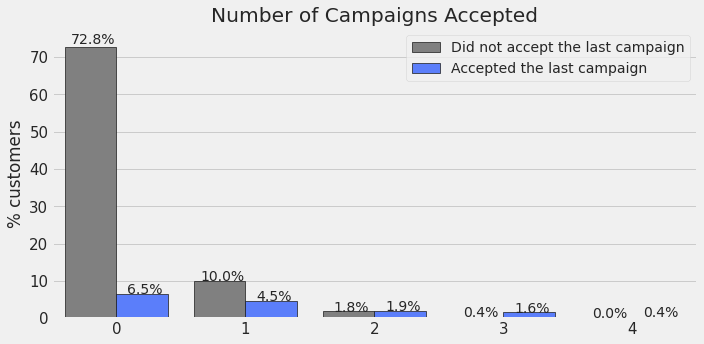

In [ ]:
# Memanggil fungsi visualisasi
response_bar_plot1(df_vis, 'Accepted_Campaign', title = 'Number of Campaigns Accepted')

- Semakin sering Campaign diterima oleh Customer, semakin besar kemungkinan mereka akan menerima Campaign berikutnya.

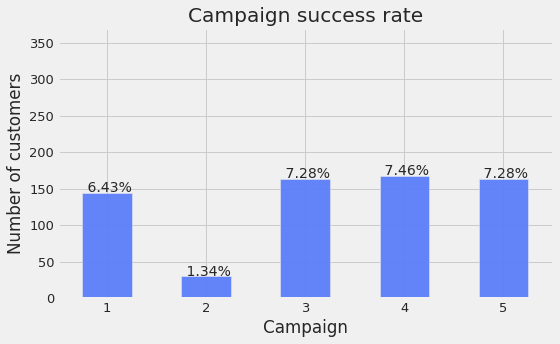

In [ ]:
df_success = df_vis[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
df_success.index = [f'{i}' for i in range(1, 6)]
df_success.sort_values('index')
ax = df_success.plot(kind = 'bar', color = '#5b7efa', 
                 alpha = .95, fontsize = 13, 
                 figsize = (8, 5))

plt.title('Campaign success rate')
plt.ylabel('Number of customers')

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    perc = p.get_height()/df.shape[0]
    x, y = p.get_xy()
    ax.annotate(f'{perc: .02%}', (x + width/2, y + height*1.01), ha = 'center')

plt.xlabel('Campaign')
plt.xticks(rotation = 0)
plt.ylim(0, 370)
plt.tight_layout()
plt.show()

- Tiga Campaign terakhir adalah Campaign paling “berhasil” dari kelima Campaign yang diberikan kepada Customer.

## Univariate Analysis

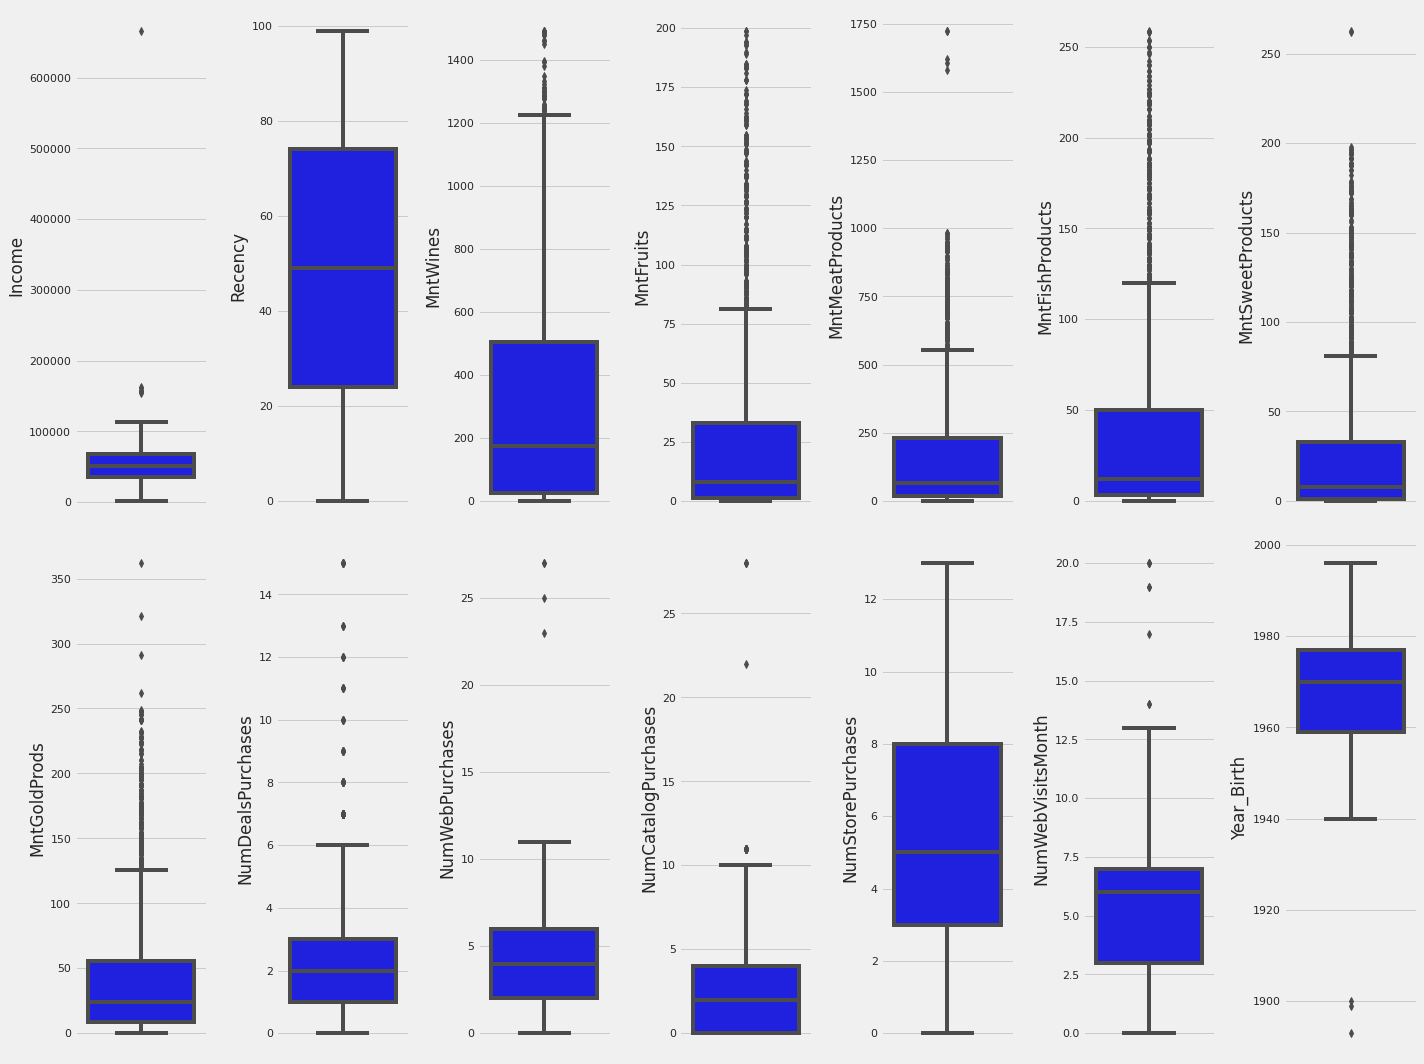

In [ ]:
# Menampilkan Boxplot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

- Kolom `Income`, `Year_Birth`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumWebVisitsMonth` terdapat oulier

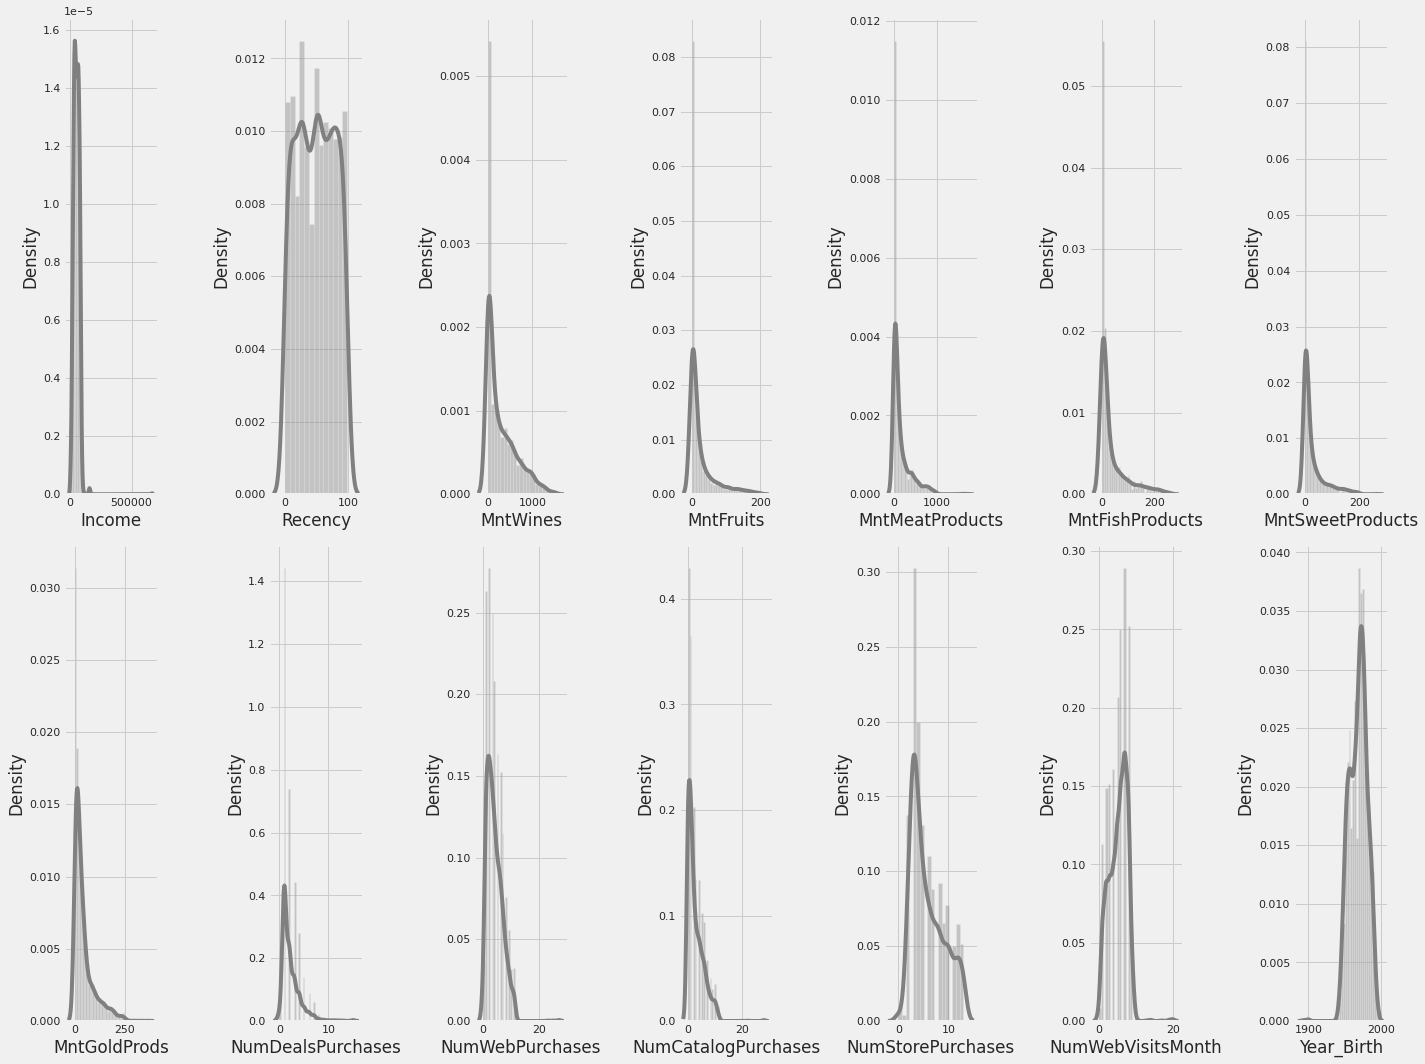

In [ ]:
# Menampilkan Distribution plot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

- Kolom `Income`, `Recency`, dan `Year_Birth` memiliki distribusi yang relatif normal
- `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` memiliki distribusi positively skewed

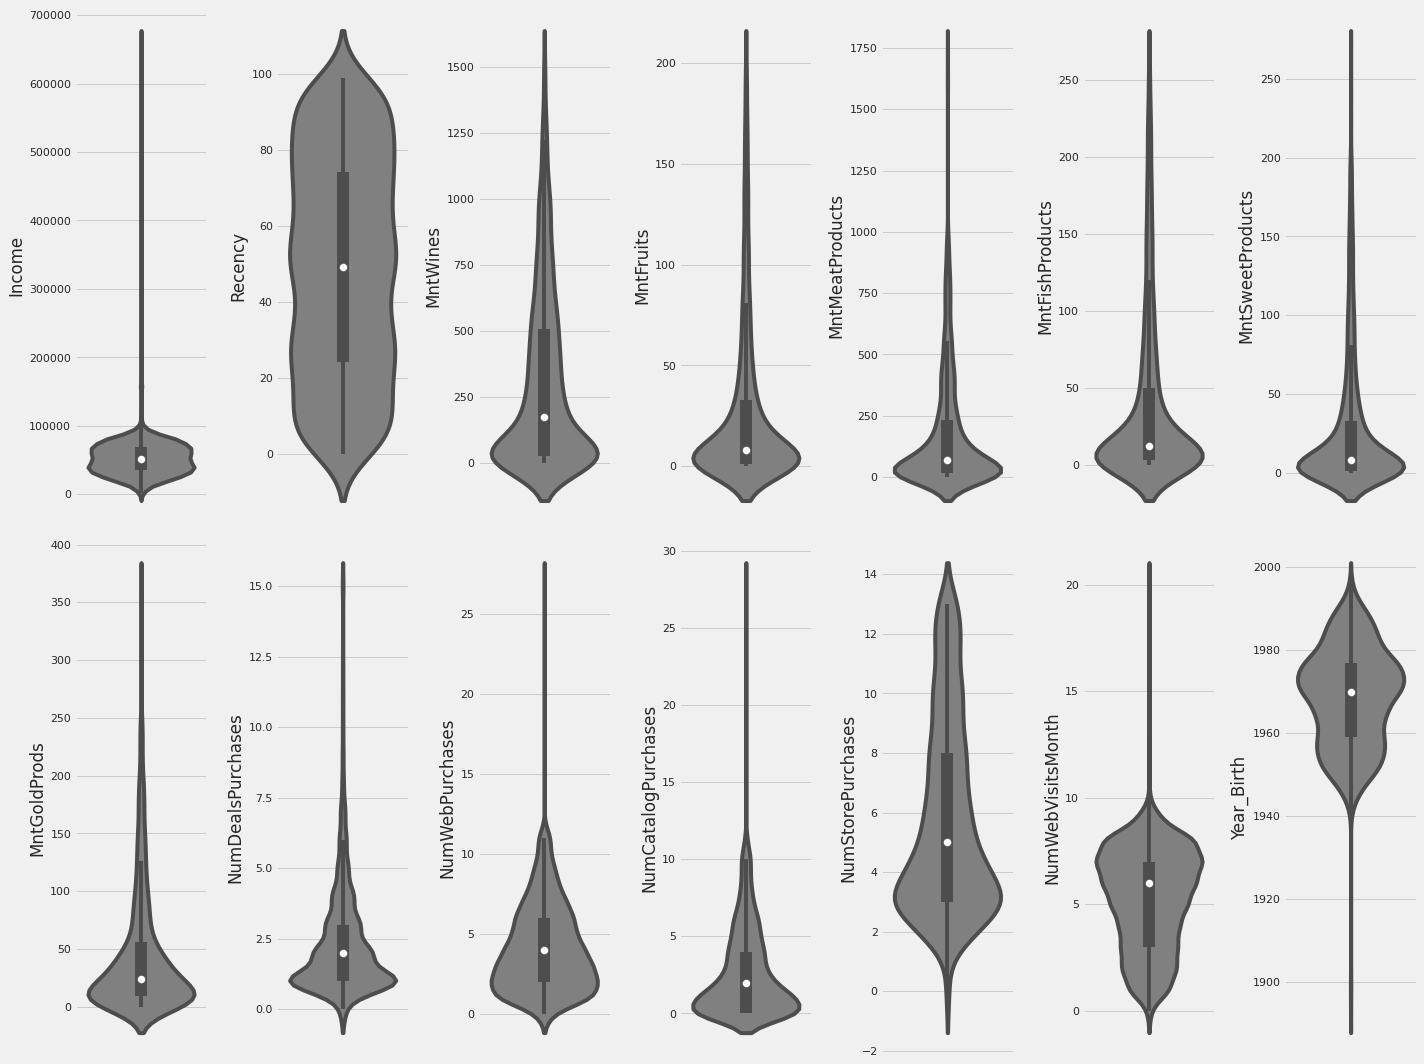

In [ ]:
# Menampilkan Violinplot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

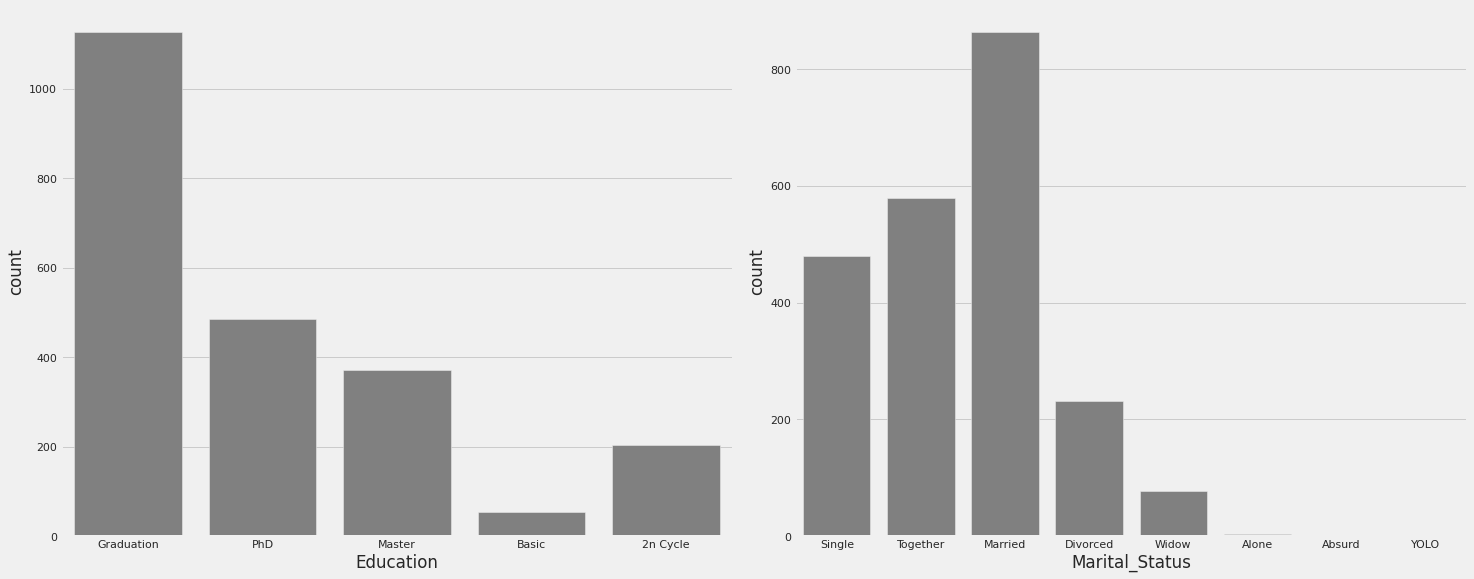

In [ ]:
# Menampilkan distribusi kolom category
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(df[cats[i]], color='gray', orient='v')
    plt.tight_layout()

- `Education` terbanyak adalah Graduation
- `Marital_Status` terbanyak adalah Married
- `Marital_Status` perlu dikelompokkan ulang

## Multivariate Analysis

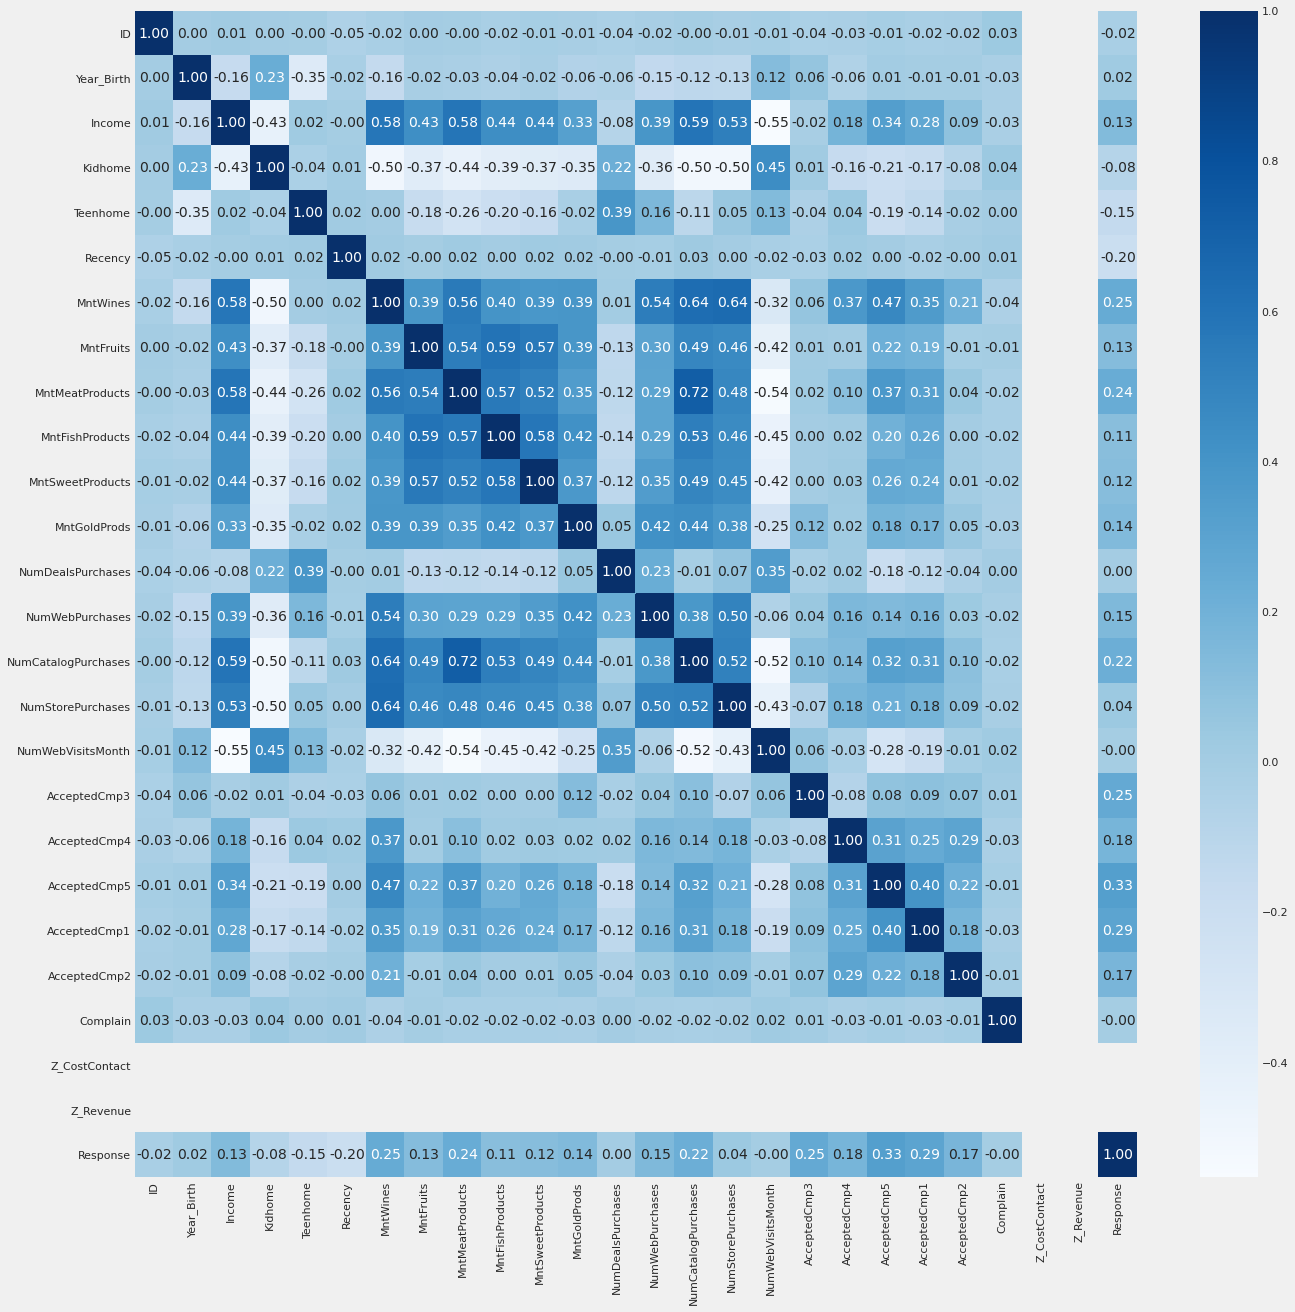

In [ ]:
# Menampilkan korelasi antar kolom menggunakan heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

- Feature `AcceptedCmp5`, `AcceptedCmp3`, `AcceptedCmp1`, `MntWines`, `MntMeatProducts`, `NumCatalogPurchases`, dan `Recency` memiliki korelasi yang relatif tinggi terhadap Response

# Data Preparation

## Missing Value

In [ ]:
# Drop mising value
df_clean = df.dropna()

In [ ]:
# Cek dataset setelah missing value didrop
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

- 24 data `NULL` telah didrop

In [ ]:
df_clean.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Duplicated Data

In [ ]:
# Cek data duplicated
df_clean.duplicated().sum()

0

- Tidak terdapat duplicated data

## Outliers

In [ ]:
# Masukkan kolom yang memiliki Outlier
filter_IQR = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases',
              'NumCatalogPurchases','NumWebVisitsMonth']

### Filter IQR

In [ ]:
# Filter Outlier dengan menggunakan IQR
print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')
filtered_entries = np.array([True] * len(df_clean))
for col in filter_IQR:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries
    
df_filter = df_clean[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_filter)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 1506


- Sebanyak 710 outlier telah difilter

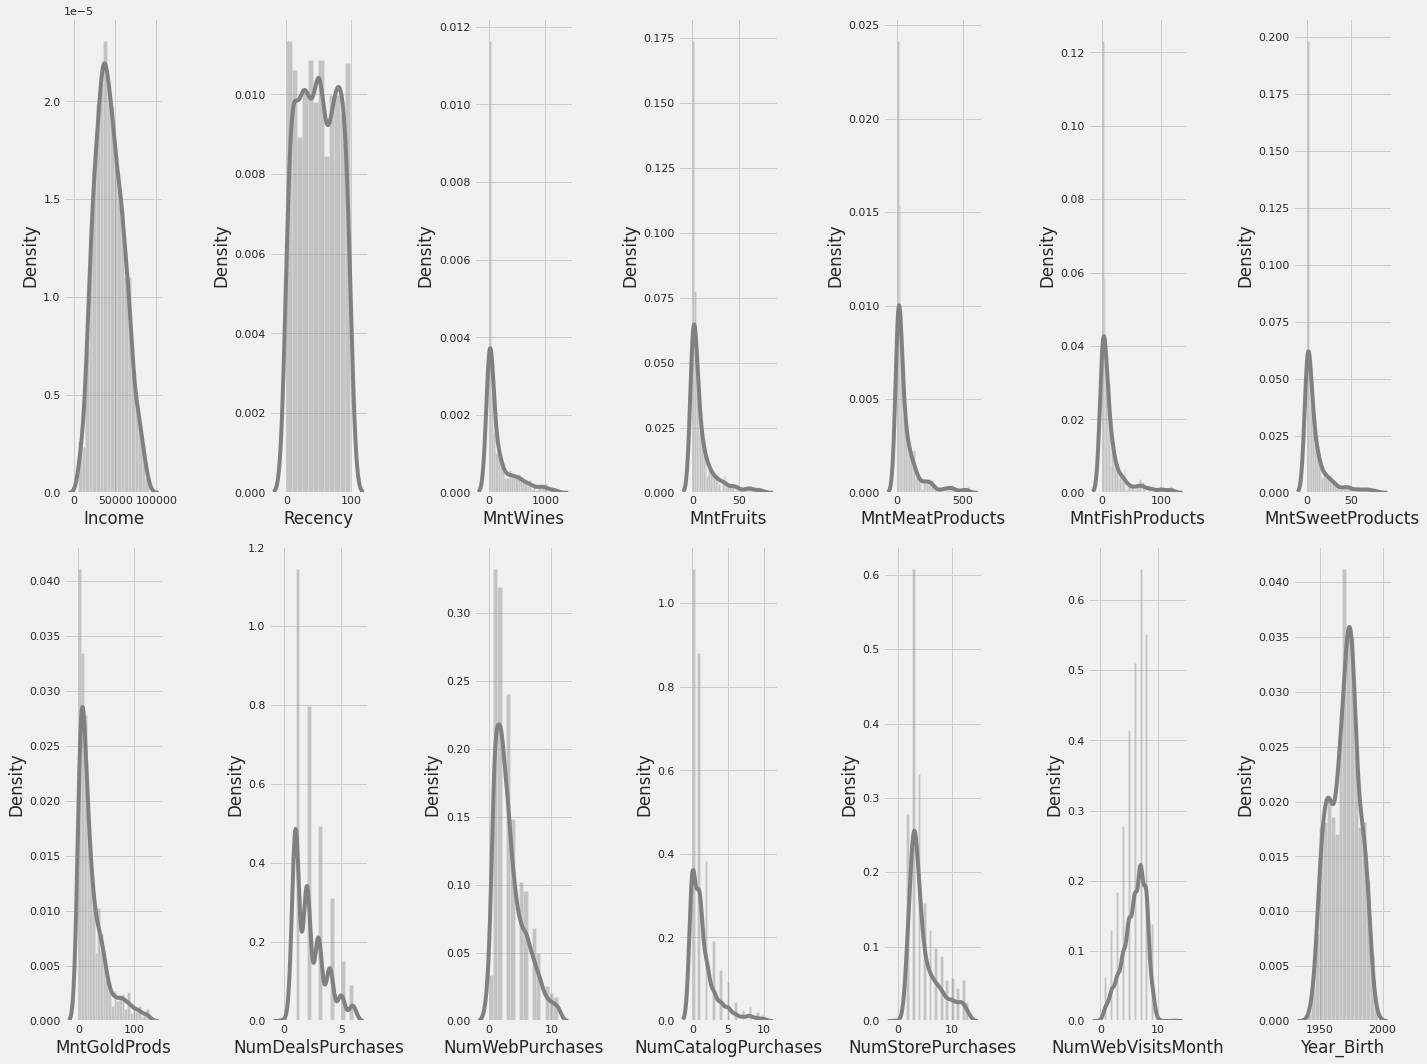

In [ ]:
# Menampilkan Distribution plot setelah filter outliers
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.distplot(df_filter[nums[i]], color='gray')
    plt.tight_layout()

- Distribusi menjadi semakin jelas setelah outlier difilter

## Log/Exp Transform

In [ ]:
# Masukkan kolom yang distribusinya positively skew
log = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Tranformasi menggunakan Log
for col in log:
    df_filter[col] = np.log(df_filter[col]+1)

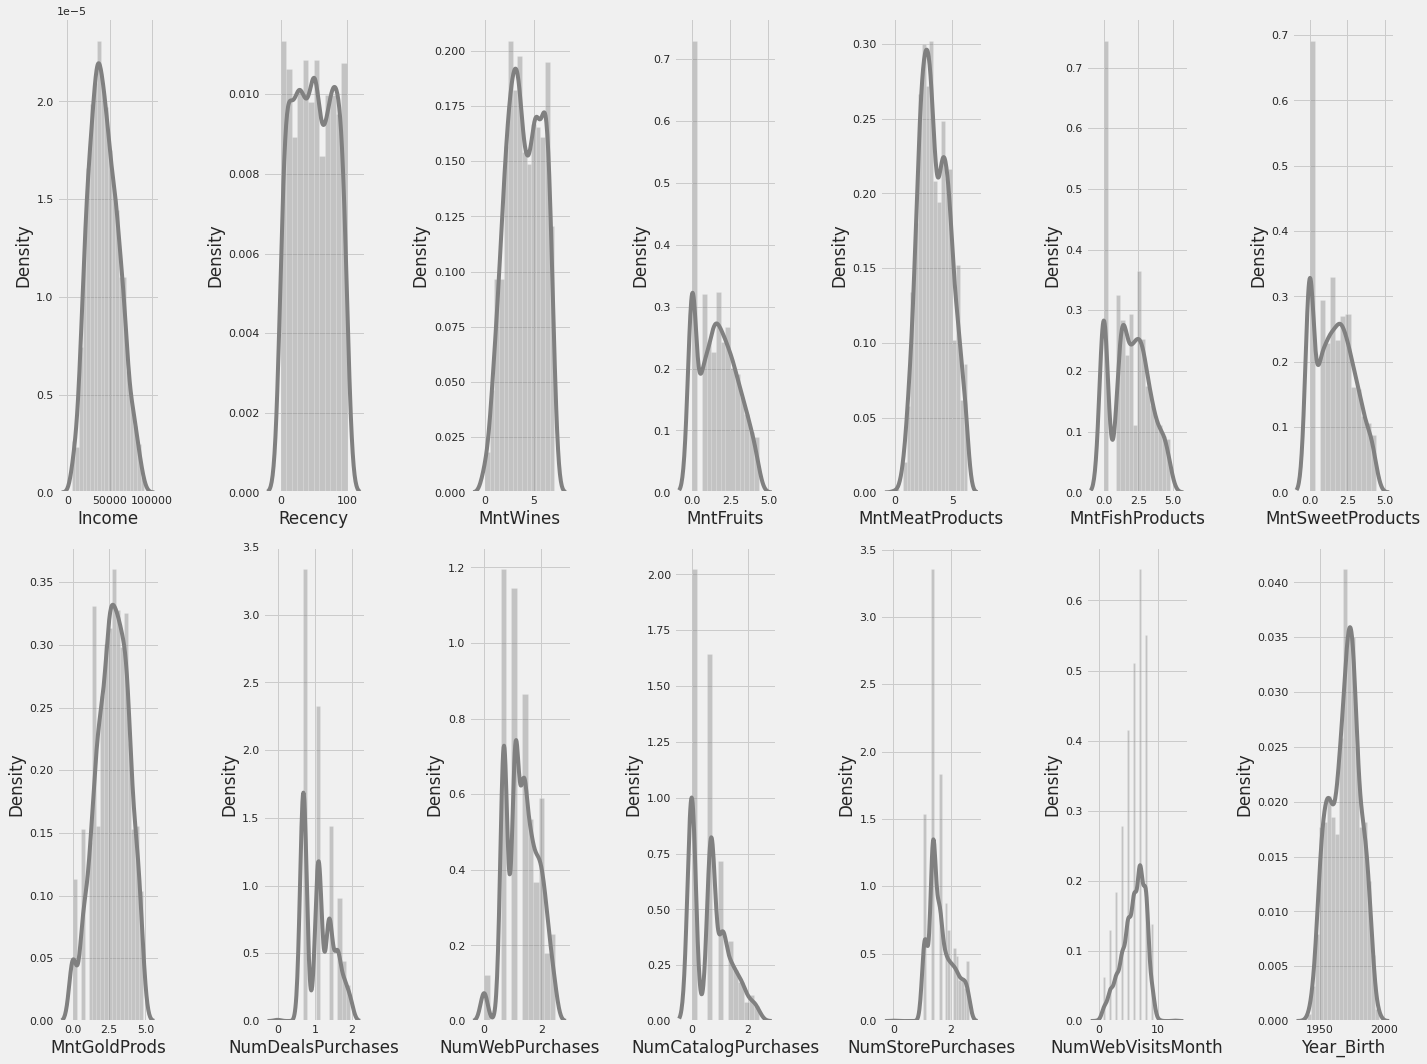

In [ ]:
# Menampilkan Distribution plot setelah transform
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.distplot(df_filter[nums[i]], color='gray')
    plt.tight_layout()

- Distribusi menjadi lebih normal (kurang skew) setelah ditransformasi

## Feature Engineering

In [ ]:
df_feature = df_filter.copy()

In [ ]:
# Lakukan Feature engineering

from datetime import datetime

list_tahun = []
for index, kolom in df_feature.iterrows():
    tahun = datetime.strptime(kolom['Dt_Customer'], '%Y-%m-%d')
    list_tahun.append(tahun)

df_feature['Dt_Customer'] = list_tahun

year_enroll = []
for index, kolom in df_feature.iterrows():
    enroll = int(datetime.strftime(kolom['Dt_Customer'], '%Y'))
    year_enroll.append(enroll)

# Mengubah Dt_Customer menjadi Long_Enroll
df_feature['Dt_Customer'] = year_enroll
df_feature['Long_Enroll'] = 2014 - df_feature['Dt_Customer']

# Mengubah Year_Birth menjadi age
df_feature['age'] = 2014 - df_feature['Year_Birth']

# Menggabungkan Kidhome dan Teenhome menjadi Children
df_feature['Children'] = df_feature['Kidhome'] + df_feature['Teenhome']

# Menggabungkan Marital_Status menjadi 2 value saja
df_feature['Marital_Status'] = np.where(df_feature['Marital_Status'].isin(['Married', 'Together']), 'In a Relationship', 'Single')

# Menggabungkan AcceptedCmp menjadi total accepted campaign
df_feature['acc_cmp'] = df_feature['AcceptedCmp1'] + df_feature['AcceptedCmp2'] + df_feature['AcceptedCmp3'] + df_feature['AcceptedCmp4'] + df_feature['AcceptedCmp5']

# Drop kolom yang telah di feature engineer
df_feature = df_feature.drop(columns=['Year_Birth', 'Z_Revenue', 'Z_CostContact', 'Dt_Customer', 'AcceptedCmp1', 
                                      'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome'])

In [ ]:
# Melihat hasil feature Engineering
df_feature.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Long_Enroll,age,Children,acc_cmp
1,2174,Graduation,Single,46344.0,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,1.098612,5,0,0,0,60,2,0
2,4141,Graduation,In a Relationship,71613.0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,2.397895,4,0,0,1,49,0,0
3,6182,Graduation,In a Relationship,26646.0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,1.609438,6,0,0,0,30,1,0
4,5324,PhD,In a Relationship,58293.0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,1.945910,5,0,0,0,33,1,0
5,7446,Master,In a Relationship,62513.0,16,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050,1.098612,1.945910,1.609438,2.397895,6,0,0,1,47,1,0


#### Label Encoding

In [ ]:
# One-Hot Encoding untuk kolom Marital_Status dan Education
for cat in cats:
    onehots = pd.get_dummies(df_feature[cat], prefix = cat)
    df_feature = df_feature.join(onehots)

In [ ]:
# Melihat hasil Encoding
df_feature.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Long_Enroll,age,Children,acc_cmp,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In a Relationship,Marital_Status_Single
1,2174,Graduation,Single,46344.0,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,1.098612,5,0,0,0,60,2,0,0,0,1,0,0,0,1
2,4141,Graduation,In a Relationship,71613.0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,2.397895,4,0,0,1,49,0,0,0,0,1,0,0,1,0
3,6182,Graduation,In a Relationship,26646.0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,1.609438,6,0,0,0,30,1,0,0,0,1,0,0,1,0
4,5324,PhD,In a Relationship,58293.0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,1.945910,5,0,0,0,33,1,0,0,0,0,0,1,1,0
5,7446,Master,In a Relationship,62513.0,16,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050,1.098612,1.945910,1.609438,2.397895,6,0,0,1,47,1,0,0,0,0,1,0,1,0


In [ ]:
# Menambahkan kolom hasil encoding ke dalam list cat_num
cat_num.append('Marital_Status_In a Relationship')
cat_num.append('Marital_Status_Single')
cat_num.append('acc_cmp')
cat_num.append('Education_2n Cycle')
cat_num.append('Education_Basic')
cat_num.append('Education_Graduation')
cat_num.append('Education_Master')
cat_num.append('Education_PhD')
cat_num.append('Long_Enroll')
cat_num.append('Children')
cat_num.remove('Kidhome')
cat_num.remove('Teenhome')
cat_num.remove('AcceptedCmp1')
cat_num.remove('AcceptedCmp2')
cat_num.remove('AcceptedCmp3')
cat_num.remove('AcceptedCmp4')
cat_num.remove('AcceptedCmp5')
nums.remove('Year_Birth')
nums.append('age')

## Standardisasi

In [ ]:
# Melakukan dan Standardisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_std = df_feature.copy()

for cols in (nums+cat_num):
    df_std[cols] = StandardScaler().fit_transform(df_std[cols].values.reshape(len(df_std), 1))

In [ ]:
# Melihat hasil Standardisasi
df_std.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Long_Enroll,age,Children,acc_cmp,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_In a Relationship,Marital_Status_Single
count,1506.000000,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1506.000000,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03,1.506000e+03
mean,5576.284197,-9.178139e-17,-3.995623e-17,-3.008881e-16,7.961759e-18,2.211600e-16,7.504695e-17,3.995623e-17,1.085158e-16,3.240731e-16,6.921385e-17,-2.516017e-16,-4.748212e-16,2.583148e-16,3.562150e-16,0.104914,-4.880263e-17,3.125728e-17,-2.471094e-16,-7.143467e-17,-1.392571e-16,2.942533e-16,-2.624432e-17,-6.008179e-17,-1.555492e-16,2.211600e-18,-2.211600e-18
std,3257.857745,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,0.306544,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00,1.000332e+00
min,1.000000,-2.218497e+00,-1.686859e+00,-2.300812e+00,-1.314026e+00,-2.681592e+00,-1.401376e+00,-1.296038e+00,-2.402486e+00,-2.827910e+00,-2.439202e+00,-1.059577e+00,-3.900040e+00,-3.041618e+00,-1.003014e-01,0.000000,-1.351121e+00,-2.344339e+00,-1.655040e+00,-3.721528e-01,-3.060750e-01,-1.891122e-01,-9.444362e-01,-4.621011e-01,-5.502437e-01,-1.364961e+00,-7.326218e-01
25%,2795.500000,-7.463368e-01,-8.602953e-01,-7.946048e-01,-7.576346e-01,-7.469400e-01,-5.932241e-01,-7.481872e-01,-6.590198e-01,-1.050959e+00,-1.163372e+00,-1.059577e+00,-6.343545e-01,-4.822947e-01,-1.003014e-01,0.000000,-1.351121e+00,-7.570883e-01,-1.931688e-01,-3.721528e-01,-3.060750e-01,-1.891122e-01,-9.444362e-01,-4.621011e-01,-5.502437e-01,-1.364961e+00,-7.326218e-01
50%,5501.500000,-7.456872e-02,7.089278e-04,-2.415170e-02,-2.212523e-02,-1.302729e-01,3.005830e-02,-2.396797e-02,8.165457e-02,-1.150962e-02,1.124575e-01,1.940820e-02,-1.086966e-01,2.956987e-02,-1.003014e-01,0.000000,1.148647e-01,-1.398242e-01,-1.931688e-01,-3.721528e-01,-3.060750e-01,-1.891122e-01,-9.444362e-01,-4.621011e-01,-5.502437e-01,7.326218e-01,-7.326218e-01
75%,8384.000000,7.074986e-01,8.617132e-01,8.412839e-01,7.448667e-01,7.680699e-01,7.248155e-01,7.898241e-01,7.829789e-01,7.259915e-01,8.587701e-01,6.505740e-01,6.839291e-01,5.414345e-01,-1.003014e-01,0.000000,1.148647e-01,8.301622e-01,1.268702e+00,-3.721528e-01,-3.060750e-01,-1.891122e-01,1.058833e+00,-4.621011e-01,-5.502437e-01,7.326218e-01,1.364961e+00
max,11191.000000,2.782669e+00,1.722717e+00,1.754722e+00,2.183118e+00,2.225382e+00,2.126464e+00,2.186951e+00,1.937732e+00,2.160621e+00,2.134600e+00,2.673098e+00,2.316772e+00,3.612622e+00,9.969955e+00,1.000000,1.580850e+00,2.593774e+00,2.730573e+00,7.605955e+00,3.267173e+00,5.287867e+00,1.058833e+00,2.164028e+00,1.817376e+00,7.326218e-01,1.364961e+00


## Machine Learning Model

### Train Test Split

In [ ]:
# Train Test Split dengan Rasio 70:30
from sklearn.model_selection import train_test_split
X = df_std.drop(columns = ['ID', 'Education', 'Marital_Status', 'Response'])
y = df_std[['Response']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

#### Balance Data Train

In [ ]:
y_train.value_counts()

Response
0           943
1           111
dtype: int64

In [ ]:
# Lakukan Oversampling SMOTE
from imblearn import under_sampling, over_sampling
X_train, y_train = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

# Tambahkan kembali column ke X_train yang telah di oversampling
X_train = pd.DataFrame(
    X_train, 
    columns=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 
             'Long_Enroll', 'age', 'Children', 'acc_cmp', 'Education_2n Cycle',
             'Education_Basic', 'Education_Graduation', 'Education_Master', 
             'Education_PhD', 'Marital_Status_In a Relationship', 
             'Marital_Status_Single'])

# Tambahkan kembali column ke y_train yang telah di oversampling
y_train = pd.DataFrame(y_train, columns=['Response'])

In [ ]:
y_train.value_counts()

Response
1           943
0           943
dtype: int64

### Model Evaluation

In [ ]:
# Import metrics evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score

# Membuat fungsi untuk evaluasi model
def eval_classification(model, pred, X_train, y_train, X_test, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred))
    print("FBeta-Score (Test Set): %.2f" % fbeta_score(y_test, pred, beta=0.5))
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

# Membuat fungsi untuk cross validasi
def cross_score(model, x, y, fold, scoring):
    kf = KFold(n_splits=fold, random_state=42)
    results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    for index, res in enumerate(results):
        print('Performance fold', index+1, '('+scoring+')', ':', res)
    print("\ncross validation score: %.2f" % np.mean(results))

# Membuat fungsi untuk menampilkan feature importance
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

# Membuat fungsi untuk menampilkan hyperparameter terbaik
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### Classification Algorithm

In [ ]:
# Import Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Import RandomizedSearch untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#### Logistic Regression

In [ ]:
# Inisiasi model logistic regression
LR = LogisticRegression(random_state=42)

# Fitting dan Evaluasi model logistic regression
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
eval_classification(LR, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.37
Recall (Test Set): 0.77
F1-Score (Test Set): 0.50
FBeta-Score (Test Set): 0.41
AUC: 0.81


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % LR.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % LR.score(X_test, y_test)) #accuracy

Train score: 0.86
Test score: 0.84


##### Hyperparameter Tuning

In [ ]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Tuning logistic regression dengan RandomizedSearch, cross validation = 5
LR = LogisticRegression(random_state=42)
LR_tuned = RandomizedSearchCV(LR, hyperparameters, cv=5, random_state=42, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
LR_tuned.fit(X_train, y_train)
y_pred = LR_tuned.predict(X_test)
eval_classification(LR_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.33
Recall (Test Set): 0.81
F1-Score (Test Set): 0.47
FBeta-Score (Test Set): 0.37
AUC: 0.81


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % LR_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % LR_tuned.score(X_test, y_test)) #accuracy

Train score: 0.83
Test score: 0.81


In [ ]:
# Menampilkan hyperparameter terbaik
print('Best algorithm:', LR_tuned.best_estimator_.get_params()['penalty'])
print('Best C:', LR_tuned.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


#### K Nearest Neighbor

In [ ]:
# Inisiasi model KNN
KNN = KNeighborsClassifier()

# Fitting dan Evaluasi model KNN
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
eval_classification(KNN, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.29
Recall (Test Set): 0.77
F1-Score (Test Set): 0.42
FBeta-Score (Test Set): 0.33
AUC: 0.77


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % KNN.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % KNN.score(X_test, y_test)) #accuracy

Train score: 0.92
Test score: 0.78


##### Hyperparameter Tuning

In [ ]:
# List hyperparameter yang akan diuji
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Tuning KNN dengan RandomizedSearch, cross validation = 5
KNN = KNeighborsClassifier()
KNN_tuned = RandomizedSearchCV(KNN, hyperparameters, cv=5, random_state=42, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
KNN_tuned.fit(X_train, y_train)
y_pred = KNN_tuned.predict(X_test)
eval_classification(KNN_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.33
Recall (Test Set): 0.57
F1-Score (Test Set): 0.42
FBeta-Score (Test Set): 0.36
AUC: 0.72


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % KNN_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % KNN_tuned.score(X_test, y_test)) #accuracy

Train score: 0.95
Test score: 0.84


In [ ]:
# Menampilkan hyperparameter terbaik
print('Best n_neighbors:', KNN_tuned.best_estimator_.get_params()['n_neighbors'])
print('Best p:', KNN_tuned.best_estimator_.get_params()['p'])
print('Best algorithm:', KNN_tuned.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 6
Best p: 1
Best algorithm: kd_tree


#### Decision Tree

In [ ]:
# Inisiasi model Decision Tree
DT = DecisionTreeClassifier(random_state=42)

# Fitting dan Evaluasi model Decision Tree
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
eval_classification(DT, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.42
Recall (Test Set): 0.57
F1-Score (Test Set): 0.48
FBeta-Score (Test Set): 0.44
AUC: 0.74


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % DT.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % DT.score(X_test, y_test)) #accuracy

Train score: 1.00
Test score: 0.87


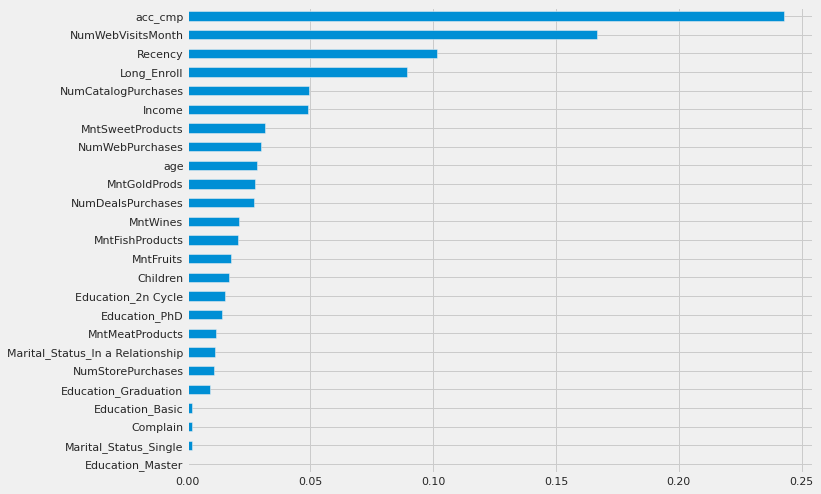

In [ ]:
# Menampilkan feature importance
show_feature_importance(DT)

##### Hyperparameter Tuning

In [ ]:
# List hyperparameter yang akan diuji
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Tuning Decision Tree dengan RandomizedSearch, cross validation = 5
DT = DecisionTreeClassifier(random_state=42)
DT_tuned = RandomizedSearchCV(DT, hyperparameters, cv=5, random_state=42, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
DT_tuned.fit(X_train, y_train)
y_pred = DT_tuned.predict(X_test)#Check performa dari model
eval_classification(DT_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.40
Recall (Test Set): 0.45
F1-Score (Test Set): 0.42
FBeta-Score (Test Set): 0.41
AUC: 0.68


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % DT_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % DT_tuned.score(X_test, y_test)) #accuracy

Train score: 0.97
Test score: 0.87


In [ ]:
# Menampilkan hyperparameter terbaik
print('Best max_depth:', DT_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', DT_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', DT_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', DT_tuned.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


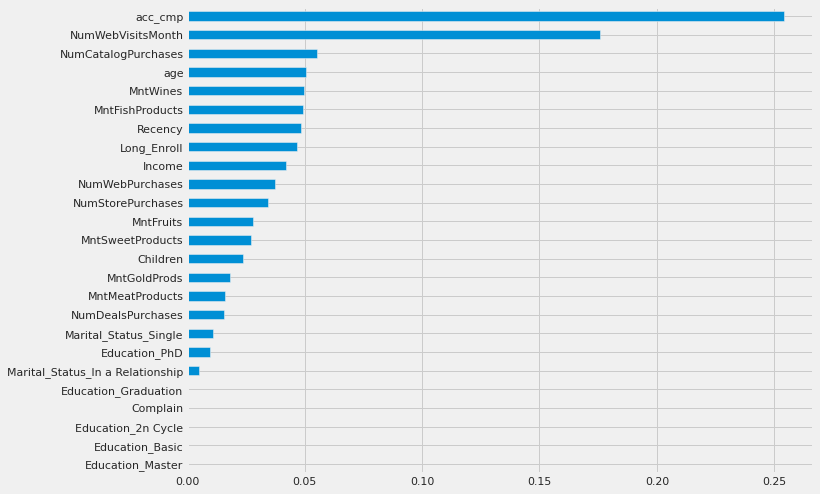

In [ ]:
# Menampilkan feature importance
show_feature_importance(DT_tuned.best_estimator_)

### Ensenmble Method

In [ ]:
# Import classifier ensemble method
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier

#### AdaBoost

In [ ]:
# Inisiasi model AdaBoost
ab = AdaBoostClassifier(random_state=42)

# Fitting dan Evaluasi model AdaBoost
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.43
Recall (Test Set): 0.49
F1-Score (Test Set): 0.46
FBeta-Score (Test Set): 0.44
AUC: 0.71


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % ab.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % ab.score(X_test, y_test)) #accuracy

Train score: 0.94
Test score: 0.88


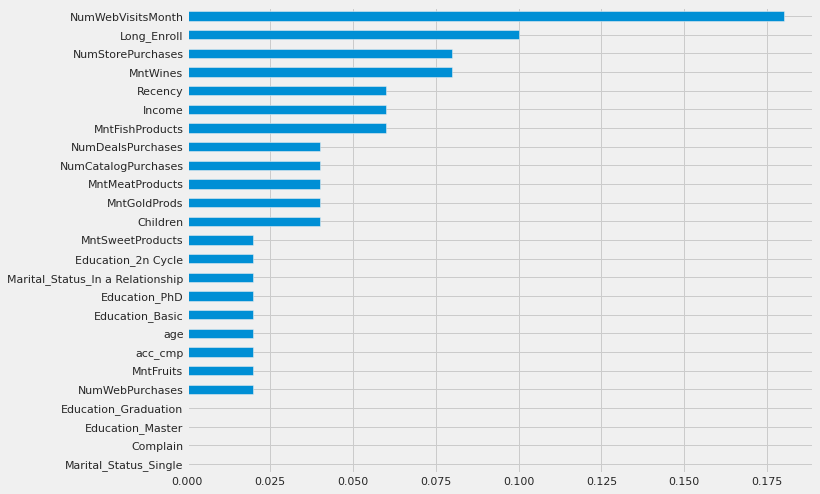

In [ ]:
# Menampilkan feature importance
show_feature_importance(ab)

##### Hyperparameter Tuning

In [ ]:
# List hyperparameter yang akan diuji
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 100)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Tuning AdaBoost dengan RandomizedSearch, cross validation = 5
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
ab_tuned.fit(X_train,y_train)
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.56
Recall (Test Set): 0.64
F1-Score (Test Set): 0.59
FBeta-Score (Test Set): 0.57
AUC: 0.79


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % ab_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % ab_tuned.score(X_test, y_test)) #accuracy

Train score: 0.95
Test score: 0.91


In [ ]:
# Menampilkan hyperparameter terbaik
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1923
Best learning_rate: 0.058
Best algorithm: SAMME.R


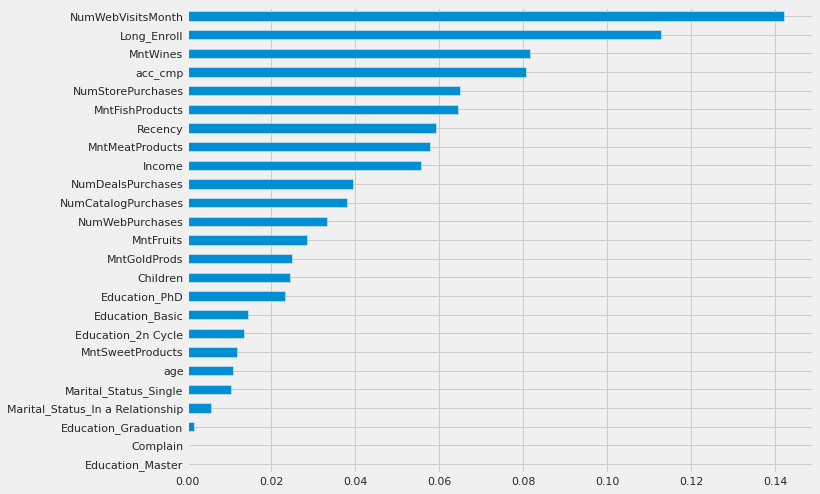

In [ ]:
# Menampilkan feature importance
show_feature_importance(ab_tuned.best_estimator_)

#### XGBoost

In [ ]:
# Inisiasi model XGBoost
xg = XGBClassifier(random_state=42)

# Fitting dan Evaluasi model XGBoost
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.61
Recall (Test Set): 0.53
F1-Score (Test Set): 0.57
FBeta-Score (Test Set): 0.59
AUC: 0.75


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % xg.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % xg.score(X_test, y_test)) #accuracy

Train score: 0.97
Test score: 0.92


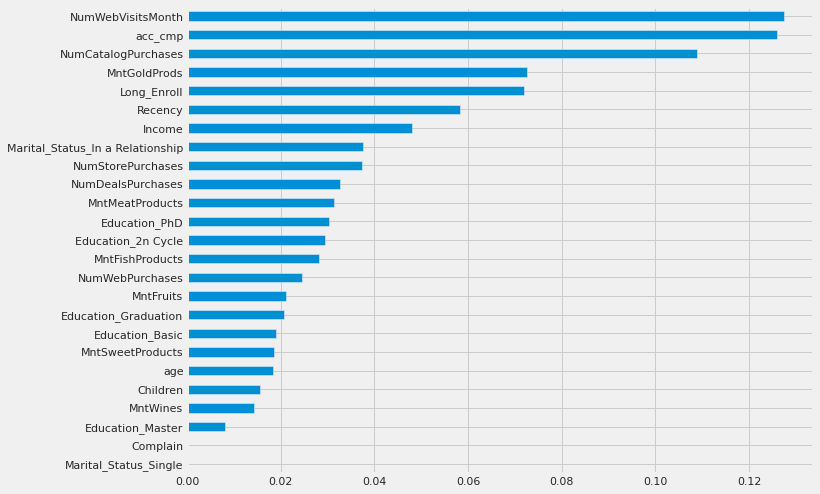

In [ ]:
# Menampilkan feature importance
show_feature_importance(xg)

##### Hyperparameter Tuning

In [ ]:
# List hyperparameter yang akan diuji
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Tuning XGBoost dengan RandomizedSearch, cross validation = 5
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
xg_tuned.fit(X_train,y_train)
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.68
Recall (Test Set): 0.53
F1-Score (Test Set): 0.60
FBeta-Score (Test Set): 0.64
AUC: 0.75


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % xg_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % xg_tuned.score(X_test, y_test)) #accuracy

Train score: 0.99
Test score: 0.92


In [ ]:
# Menampilkan hyperparameter terbaik
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 60
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: auto
Best colsample_bytree: 0.6000000000000001
Best eta: 0.3535353535353536
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


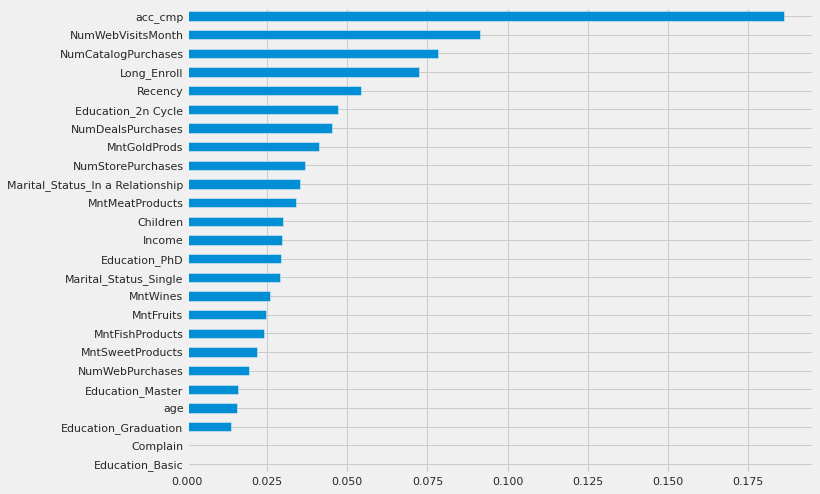

In [ ]:
# Menampilkan feature importance
show_feature_importance(xg_tuned.best_estimator_)

#### Random Forest

In [ ]:
# Inisiasi model Random Forest
RF = RandomForestClassifier(random_state=42)

# Fitting dan Evaluasi model Random Forest
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
eval_classification(RF, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.75
Recall (Test Set): 0.45
F1-Score (Test Set): 0.56
FBeta-Score (Test Set): 0.66
AUC: 0.71


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % RF.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % RF.score(X_test, y_test)) #accuracy

Train score: 1.00
Test score: 0.93


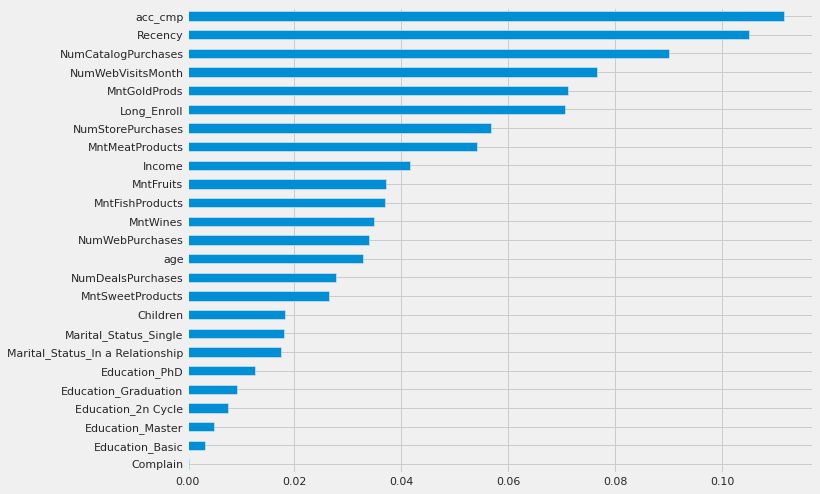

In [ ]:
# Menampilkan feature importance
show_feature_importance(RF)

##### Hyperparameter Tuning

In [ ]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Tuning Random Forest dengan RandomizedSearch, cross validation = 5
RF = RandomForestClassifier(random_state=42)
RF_tuned = RandomizedSearchCV(RF, hyperparameters, cv=5, random_state=42, scoring='accuracy')

# Fitting dan Evaluasi model setelah tuning
RF_tuned.fit(X_train,y_train)
y_pred = RF_tuned.predict(X_test)#Check performa dari model
eval_classification(RF_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.78
Recall (Test Set): 0.38
F1-Score (Test Set): 0.51
FBeta-Score (Test Set): 0.65
AUC: 0.69


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % RF_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % RF_tuned.score(X_test, y_test)) #accuracy

Train score: 1.00
Test score: 0.92


In [ ]:
# Menampilkan hyperparameter terbaik
show_best_hyperparameter(RF_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


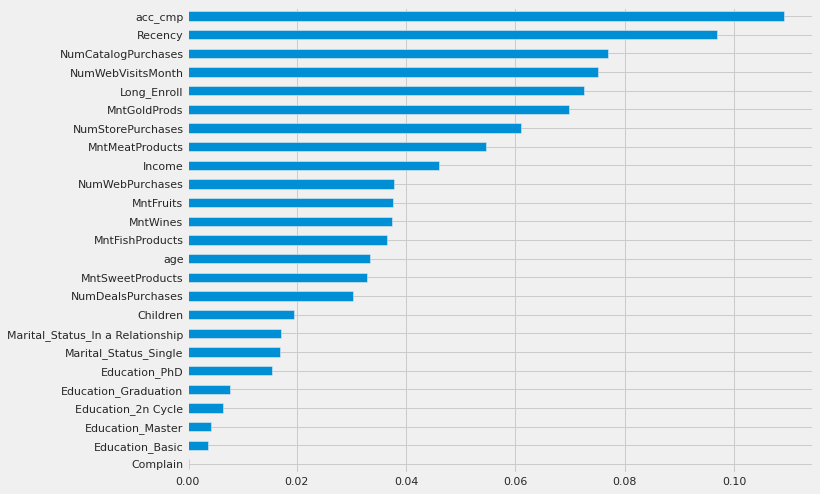

In [ ]:
# Menampilkan feature importance
show_feature_importance(RF_tuned.best_estimator_)

### Best Algorithm
Algoritma yang menghasilkan model terbaik adalah Random Forest. Hyperparameter tuning dan eliminasi feature importance rendah akan diaplikasikan pada Algoritma Random Forest.

In [ ]:
# Eliminasi feature importance rendah
X = df_std.drop(columns = ['ID', 'Education', 'Marital_Status', 'Response', 'Complain'])
y = df_std[['Response']]

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [ ]:
# Lakukan Oversampling SMOTE
X_train, y_train = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

# Tambahkan kembali column ke X_train yang telah di oversampling
X_train = pd.DataFrame(
    X_train, 
    columns=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth','Long_Enroll', 'age', 
             'Children', 'acc_cmp', 'Education_2n Cycle','Education_Basic', 
             'Education_Graduation', 'Education_Master', 'Education_PhD', 
             'Marital_Status_In a Relationship', 'Marital_Status_Single'])

# Tambahkan kembali column ke y_train yang telah di oversampling
y_train = pd.DataFrame(y_train, columns=['Response'])

In [ ]:
# Inisiasi model dengan best hyperparameter
RF_tuned = RandomForestClassifier(
    random_state=42, n_estimators=400, bootstrap=True, 
    criterion='gini', max_depth=110, min_samples_split=4, 
    min_samples_leaf=1, max_features='log2', n_jobs=-1)

# Fitting dan Evaluasi model
RF_tuned.fit(X_train,y_train)
y_pred = RF_tuned.predict(X_test)#Check performa dari model
eval_classification(RF_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.77
Recall (Test Set): 0.43
F1-Score (Test Set): 0.55
FBeta-Score (Test Set): 0.66
AUC: 0.71


In [ ]:
# Menampilkan akurasi model pada data train dan test
print('Train score: %.2f' % RF_tuned.score(X_train, y_train)) #accuracy
print('Test score: %.2f' % RF_tuned.score(X_test, y_test)) #accuracy

Train score: 1.00
Test score: 0.93


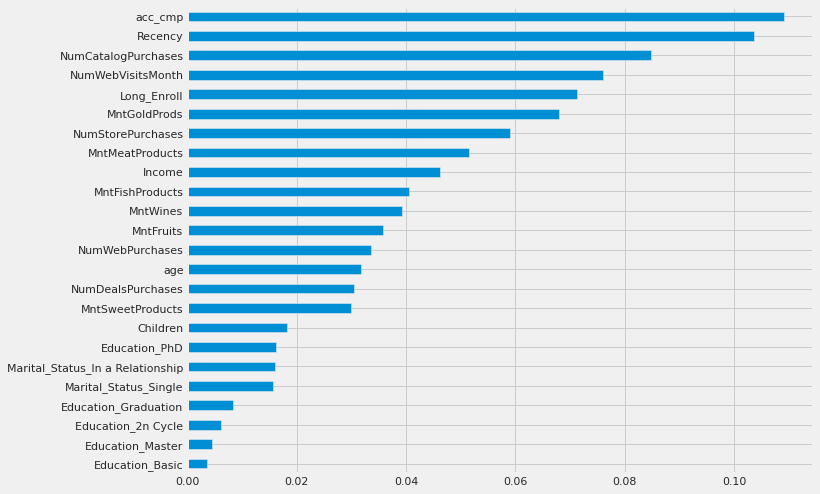

In [ ]:
# Menampilkan feature importance
show_feature_importance(RF_tuned)

# Business Impact

In [ ]:
# Menyimpan hasil prediksi model ke dalam DataFrame
ypred = pd.DataFrame(y_pred)

In [ ]:
# Melihat value dari hasil prediksi
ypred.value_counts()

0    426
1     26
dtype: int64

## Confusion Matrix

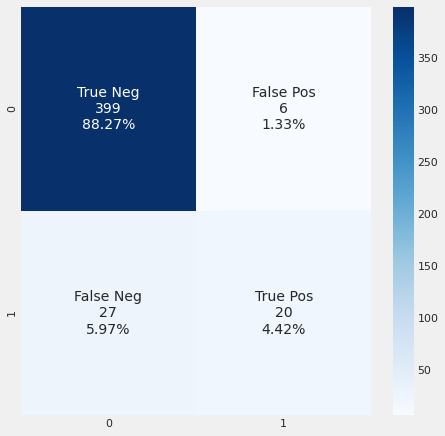

In [ ]:
# Menampilkan Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (7, 7))
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

- Dari hasil pemodelan diperoleh 20 dari 26 customer yang akan menerima Campaign selanjutnya.

## Perhitungan Impact

In [ ]:
group_counts

['399', '6', '27', '20']

In [ ]:
# Menghitung Impact Model Machine Learning
total_customer = int(group_counts[1])+int(group_counts[3])
customer_lead = int(group_counts[3])
cost_next_campaign = cost
revenue_next_campaign = revenue

# ROI y_test
ROI = ((customer_lead*revenue)/(total_customer*cost))*100

print('Total Customer (y_test):', total_customer,'customer')
print('Customer Lead (y_test):', customer_lead,'customer')
print('Cost (y_test):', (total_customer*cost),'$')
print('Revenue (y_test):', (customer_lead*revenue),'$')
print(('Return Of Investment (y_test): %.2f' % ROI)+'%')

Total Customer (y_test): 26 customer
Customer Lead (y_test): 20 customer
Cost (y_test): 78 $
Revenue (y_test): 220 $
Return Of Investment (y_test): 282.05%


- Hasil dari perhitungan menunjukkan bahwa penerapan Machine Learning dapat meningkatkan ROI dari 54% menjadi 282%

In [ ]:
# Perhitungan Impact jika total_customer diperluas sebesar false negative
total_customer = int(group_counts[1]) + int(group_counts[3]) + int(group_counts[2])
customer_lead_worst = int(group_counts[3])
customer_lead_mid = int(group_counts[3]) + int(int(group_counts[2])/2)
customer_lead_best = int(group_counts[3]) + int(group_counts[2])

# ROI y_test
ROI_worst = ((customer_lead_worst*revenue)/(total_customer*cost))*100
ROI_mid = ((customer_lead_mid*revenue)/(total_customer*cost))*100
ROI_best = ((customer_lead_best*revenue)/(total_customer*cost))*100

print('Cost (y_test):', (total_customer*cost),'$')
print('Total Customer (y_test):', total_customer,'customer')
print('------------------------------------')
print('Customer Lead worst case(y_test):', customer_lead_worst,'customer')
print('Revenue worst case (y_test):', (customer_lead_worst*revenue),'$')
print(('ROI worst case (y_test): %.2f' % ROI_worst)+'%')
print('------------------------------------')
print('Customer Lead mid case (y_test):', customer_lead_mid,'customer')
print('Revenue mid case (y_test):', (customer_lead_mid*revenue),'$')
print(('ROI mid case (y_test): %.2f' % ROI_mid)+'%')
print('------------------------------------')
print('Customer Lead best case (y_test):', customer_lead_best,'customer')
print('Revenue best case (y_test):', (customer_lead_best*revenue),'$')
print(('ROI best case (y_test): %.2f' % ROI_best)+'%')

Cost (y_test): 159 $
Total Customer (y_test): 53 customer
------------------------------------
Customer Lead worst case(y_test): 20 customer
Revenue worst case (y_test): 220 $
ROI worst case (y_test): 138.36%
------------------------------------
Customer Lead mid case (y_test): 33 customer
Revenue mid case (y_test): 363 $
ROI mid case (y_test): 228.30%
------------------------------------
Customer Lead best case (y_test): 47 customer
Revenue best case (y_test): 517 $
ROI best case (y_test): 325.16%


- Terlihat bahwa jika total_customer (total Campaign yang disebar) diperluas sebanyak jumlah False Negative, dalam worst case scenario masih menguntungkan Perusahaan.